In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator

# caminhos para os csvs
ocorrencia_path = './dados/ocorrencia.csv'    
aeronave_path = './dados/aeronave.csv'    
ocorrencia_tipo_path = './dados/ocorrencia_tipo.csv'    
fator_contribuinte_path = './dados/fator_contribuinte.csv'    
recomendacao_path = './dados/recomendacao.csv'    

# datesets completos
ocorrencia = pd.read_csv(ocorrencia_path, encoding="latin1", sep=";")
aeronave = pd.read_csv(aeronave_path, encoding="latin1", sep=";")
ocorrencia_tipo = pd.read_csv(ocorrencia_tipo_path, encoding="latin1", sep=";")
fator_contribuinte = pd.read_csv(fator_contribuinte_path, encoding="latin1", sep=";")
recomendacao = pd.read_csv(recomendacao_path, encoding="latin1", sep=";")

ocorrencia.head(5)


,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,87125,87125,87125,87125,87125,INCIDENTE,-7.219166666666,-39.26944444444,JUAZEIRO DO NORTE,CE,...,11/05/2025,04:20:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
1,87124,87124,87124,87124,87124,INCIDENTE,-18.88361111111,-48.22527777777,UBERLÂNDIA,MG,...,08/05/2025,14:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
2,87123,87123,87123,87123,87123,INCIDENTE,-23.43555555555,-46.47305555555,GUARULHOS,SP,...,09/05/2025,18:45:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
3,87122,87122,87122,87122,87122,INCIDENTE,-29.71083333333,-53.69222222222,SANTA MARIA,RS,...,04/05/2025,14:45:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
4,87121,87121,87121,87121,87121,INCIDENTE,-20.81722222222,-49.40694444444,SÃO JOSÉ DO RIO PRETO,SP,...,10/05/2025,10:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO


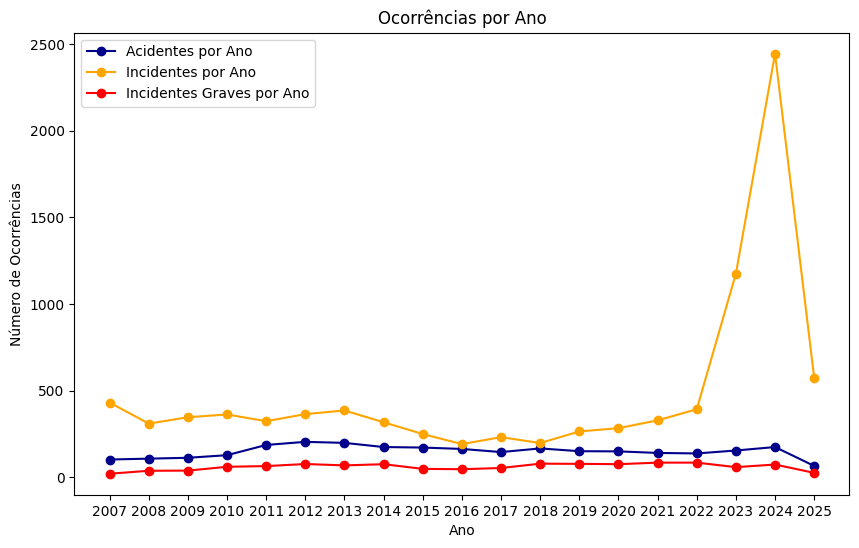

In [10]:
# ocorrencias por ano
# transformações no dataframe
def get_year(date_str):
    return int(date_str.split('/')[2])

# add no dataframe
datas = ocorrencia['ocorrencia_dia']
ocorrencia = ocorrencia.assign(ocorrencia_ano=datas.apply(get_year)) # cria nova coluna ocorrencia_ano

acidente_por_ano = ocorrencia[ocorrencia['ocorrencia_classificacao'] == 'ACIDENTE'].groupby('ocorrencia_ano')['codigo_ocorrencia'].count()
incidente_por_ano = ocorrencia[ocorrencia['ocorrencia_classificacao'] == 'INCIDENTE'].groupby('ocorrencia_ano')['codigo_ocorrencia'].count()
graves_por_ano = ocorrencia[ocorrencia['ocorrencia_classificacao'] == 'INCIDENTE GRAVE'].groupby('ocorrencia_ano')['codigo_ocorrencia'].count()

plt.figure(figsize=(10, 6))  # largura=10, altura=6 (em polegadas)

plt.plot(acidente_por_ano, marker="o", color="darkblue", label="Acidentes por Ano")
plt.plot(incidente_por_ano, marker="o", color="orange", label="Incidentes por Ano")
plt.plot(graves_por_ano, marker="o", color="red", label="Incidentes Graves por Ano")

# Add labels and title
plt.xlabel("Ano")
plt.ylabel("Número de Ocorrências")
plt.title("Ocorrências por Ano")
plt.legend()

ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1))  # espaçamento de 1 unidade

# Show the plot
plt.show()

In [ ]:
# numero de aeronaves envolvidas
ocorr_num_aero = ocorrencia.groupby('total_aeronaves_envolvidas')['codigo_ocorrencia'].count().reset_index()
ocorr_num_aero.head(5)

ocorr_num_aero

# Criar o gráfico de barras
# plt.bar(ocorr_num_aero['total_aeronaves_envolvidas'], np.log(ocorr_num_aero['codigo_ocorrencia']), color='darkblue')

# # Adicionar título e rótulos
# plt.title("Número de Ocorrências por Número de Aeronaves Envolvidas")
# plt.xlabel("Número de Aeronaves Envolvidas")
# plt.ylabel(r"$\log (Ocorrências)$")

# # Mostrar o gráfico
# plt.show()

,total_aeronaves_envolvidas,codigo_ocorrencia
0,0,1
1,1,13073
2,2,107
3,3,3
4,4,1


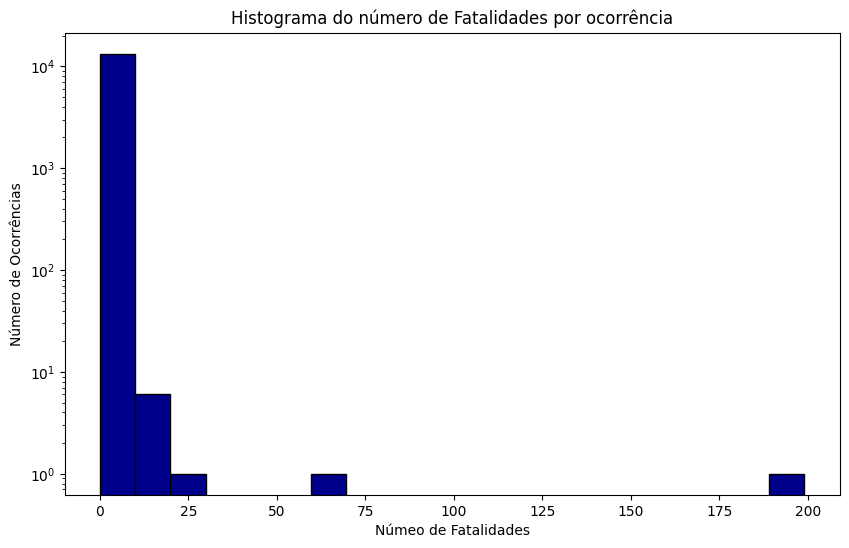

,codigo_ocorrencia,aeronave_fatalidades_total,ocorrencia_dia
13248,29859,199.0,17/07/2007
1585,85259,62.0,09/08/2024
12876,34935,24.0,07/02/2009
11334,44796,16.0,13/07/2011
12487,37577,14.0,22/05/2009
...,...,...,...
13265,29595,0.0,24/06/2007
488,86486,0.0,25/01/2025
13267,29535,0.0,15/06/2007
13300,28256,0.0,07/01/2007


In [27]:
# fatalidades
# ocorrencia_aeronave = ocorrencia.merge(
#     aeronave, 
#     left_on="codigo_ocorrencia2", 
#     right_on="codigo_ocorrencia2", 
#     how="inner"
# )
# ocorrencia_aeronave.columns
ocorrencia_aeronave = ocorrencia.merge(
    aeronave, 
    left_on="codigo_ocorrencia2", 
    right_on="codigo_ocorrencia2", 
    how="inner"
)[['codigo_ocorrencia', 'aeronave_fatalidades_total', 'ocorrencia_dia']]

plt.figure(figsize=(10, 6)) 
plt.hist(ocorrencia_aeronave['aeronave_fatalidades_total'], bins=20, color="darkblue", edgecolor="black", log=True)

plt.title("Histograma do número de Fatalidades por ocorrência")
plt.xlabel("Númeo de Fatalidades")
plt.ylabel("Número de Ocorrências")
plt.show()

ocorrencia_aeronave.sort_values(ascending=False, by="aeronave_fatalidades_total")